# Predição de custos de casas em Boston utilizando machine learning

Projeto destino a explorar banco de dados de casas em boston e atráves de técnicas de machine learning, entender qual o melhor algorítimo para prever os custos de casas tendo em vista as suas características

# Importe de bibliotecas 

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do banco de dados 'load_boston' e transformação em data frame

Descrição das colunas do dataframe:

CRIM per capita crime rate by town¶
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000 dolars
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in 1000 dolars

In [2]:
raw_data = load_boston()
boston_df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
# Adicionando uma coluna com as classes (Y)
boston_df["MEDV"] = raw_data["target"]
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#Verificando colunas vazias
missing_atts = []
for (colName, colData) in boston_df.iteritems():
    if (np.any(colData=='?')):
        missing_atts.append(colName)
        print(colName)

# Estatística descritiva

Retorna análises básicas do dataframe (média, desvio padrão, Q1, Q3, etc)

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

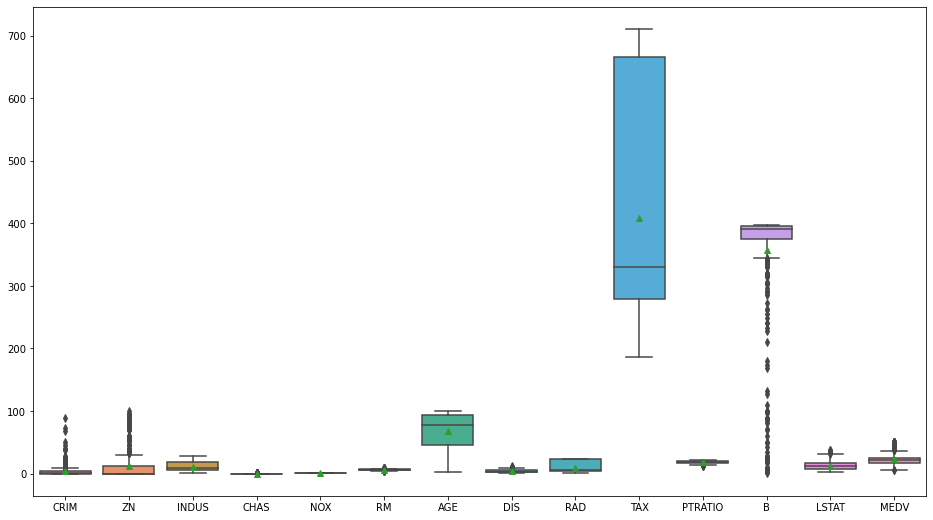

In [5]:
#Boxplot
plt.figure(figsize=(16,9))
sns.boxplot(data=boston_df, showmeans=True)

<AxesSubplot:>

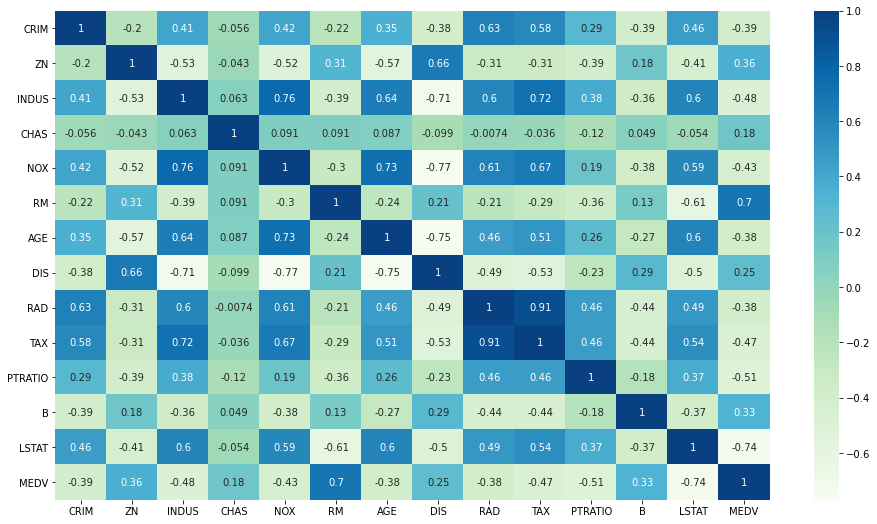

In [6]:
#Correlação de Pearson

plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),
            annot=True,
            cmap="GnBu")

# Separando x e y e conjuntos de treino e teste

In [7]:
#Separando x e y
y = raw_data["target"]
X = raw_data["data"]

#Outra forma de fazer
#y = boston_df[boston_df.columns[13:]]
#X = boston_df[boston_df.columns[:13]]


#Separando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 20)
print(f"X :{X.shape}")
print(f"y :{y.shape}")

print("%.0f%% do conjunto de dados será utilizado para teste" % (len(X_test)*100/(len(X_train)+len(X_test))))

X :(506, 13)
y :(506,)
25% do conjunto de dados será utilizado para teste


# Correlação Múltipla

In [8]:
# Correlação Múltipla:

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
coeficientes_lineares = LR.coef_
termo_independete = LR.intercept_ 

#Predição:
y_pred = LR.predict(X_test)

#R²:
accuracy_linear_regression = LR.score(X_train,y_train)

print("R² da equação: %.2f%%" % (accuracy_linear_regression*100))

R² da equação: 74.19%


# Árvore de Decisão 

RMSE:  6.658787338464688
R2:  44.992030989454776


[Text(1955.0392482850607, 2748.2, 'RM <= 6.838\nmse = 85.539\nsamples = 379\nvalue = 22.732'),
 Text(1181.8611185213413, 2591.16, 'LSTAT <= 14.4\nmse = 39.843\nsamples = 313\nvalue = 19.795'),
 Text(553.3836699695122, 2434.12, 'DIS <= 1.385\nmse = 25.63\nsamples = 180\nvalue = 23.45'),
 Text(338.09611280487803, 2277.08, 'RM <= 5.741\nmse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(330.8375762195122, 2120.04, 'mse = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(345.3546493902439, 2120.04, 'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(768.6712271341463, 2277.08, 'RM <= 6.543\nmse = 13.857\nsamples = 176\nvalue = 22.972'),
 Text(359.87172256097557, 2120.04, 'LSTAT <= 7.76\nmse = 6.958\nsamples = 142\nvalue = 21.786'),
 Text(151.97560975609755, 1963.0, 'DIS <= 6.126\nmse = 3.329\nsamples = 34\nvalue = 24.218'),
 Text(76.21463414634145, 1805.9599999999998, 'LSTAT <= 7.195\nmse = 2.827\nsamples = 19\nvalue = 25.147'),
 Text(47.18048780487804, 1648.9199999999998, 'LSTAT <= 6.92\nmse = 2.631\nsa

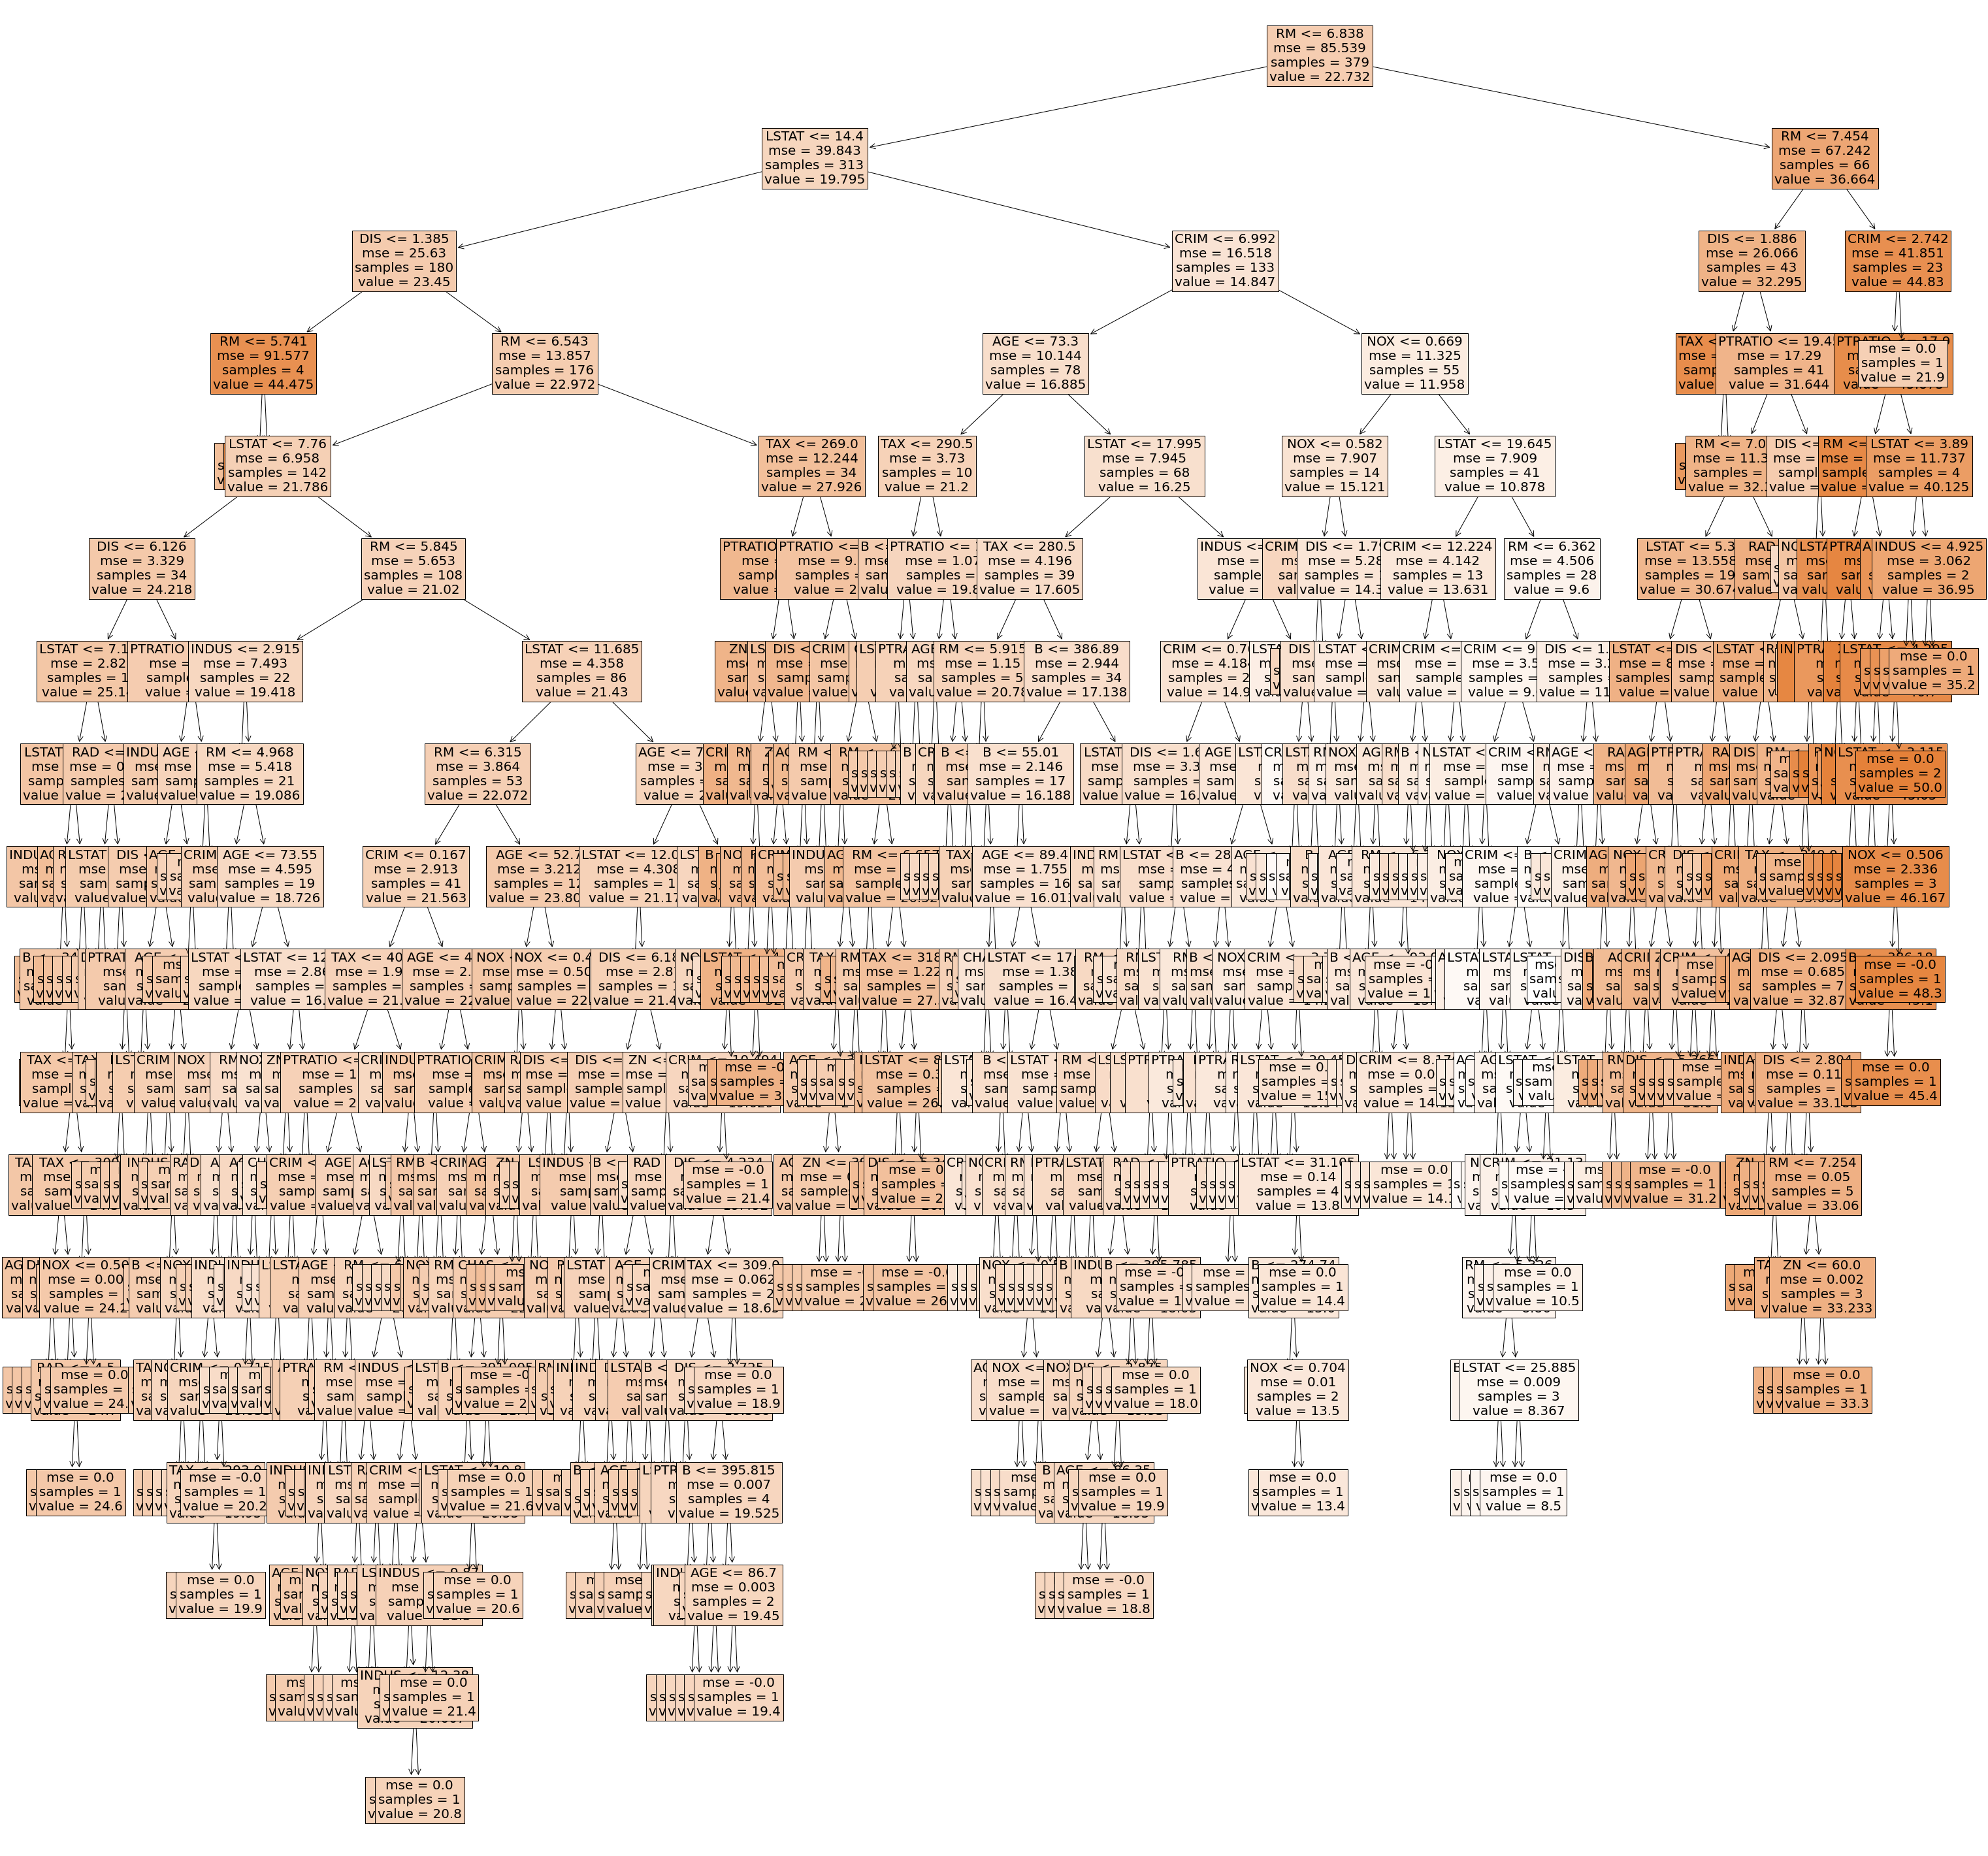

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

boston_dt = DecisionTreeRegressor()
boston_dt.fit(X_train,y_train)

# Fazendo a Predição do Modelo:
y_pred = boston_dt.predict(X_test)

# Avaliando o Modelo:
resultados = {}

name = "Decision tree"
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2*100)

#Plotando a árvore:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
ftr = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.figure(figsize=(52,52))
plot_tree(boston_dt, filled=True, fontsize = 20, feature_names = ftr)

# PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Separando as colunas X e a coluna Y pois a padronização é aplicada apenas em X
y = boston_df[boston_df.columns[13:]]
X = boston_df[boston_df.columns[:13]]

#Padronizando as colunas de X - Média = 1 e desvpad = 0
x_standard = StandardScaler().fit_transform(X)
len(X)

506

In [21]:
pca = PCA(n_components=8)
principal_components = pca.fit_transform(x_standard)
principal_df = pd.DataFrame(data = principal_components)

print("As %d componentes principais explicam %.2f%% da variancia dos dados originais" % (len(pca.components_),
                                                                                         pca.explained_variance_ratio_.sum() * 100))
component_names = ['component {}'.format(i) for i in range(len(pca.components_))]

As 8 componentes principais explicam 92.95% da variancia dos dados originais


In [22]:
final_df = pd.concat([principal_df, boston_df[['MEDV']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,36.2
...,...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896,22.4
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502,20.6
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660,23.9
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344,22.0


In [23]:
PCA_df = np.concatenate((principal_components,y),axis=1)

# Separando x e y e conjuntos de treino e teste após PCA

In [25]:
#Separando x e y
y = final_df[final_df.columns[8:]]
X = final_df[final_df.columns[:8]]

#Separando conjunto de treino e teste
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X, y, test_size=0.25, random_state = 20)

print(f"X :{X.shape}")
print(f"y :{y.shape}")

print("%.0f%% do conjunto de dados será utilizado para teste" % (len(X_test_PCA)*100/(len(X_train_PCA)+len(X_test_PCA))))

X :(506, 8)
y :(506, 1)
25% do conjunto de dados será utilizado para teste


# PCR

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Método de cross link (K Fold)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# MSE
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(principal_df),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)
score

84.75222422500497

# Árvore de Decisão após PCA

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

final_dt = DecisionTreeRegressor()
final_dt.fit(X_train_PCA,y_train_PCA)

# Fazendo a Predição do Modelo:
y_pred = final_dt.predict(X_test_PCA)

RMSE:  5.327943108277394
R2:  0.647828280504726


[Text(1517.1475609756096, 2650.0499999999997, 'X[0] <= -0.16\nmse = 85.539\nsamples = 379\nvalue = 22.732'),
 Text(840.4024390243902, 2296.71, 'X[2] <= 0.521\nmse = 67.659\nsamples = 204\nvalue = 27.448'),
 Text(406.9317073170731, 1943.37, 'X[2] <= -0.799\nmse = 15.984\nsamples = 134\nvalue = 23.183'),
 Text(141.54146341463414, 1590.03, 'X[5] <= 0.167\nmse = 6.544\nsamples = 43\nvalue = 20.228'),
 Text(70.77073170731707, 1236.6899999999998, 'mse = 3.161\nsamples = 12\nvalue = 17.867'),
 Text(212.31219512195122, 1236.6899999999998, 'X[3] <= 0.134\nmse = 4.86\nsamples = 31\nvalue = 21.142'),
 Text(141.54146341463414, 883.3499999999999, 'mse = 3.977\nsamples = 14\nvalue = 22.2'),
 Text(283.0829268292683, 883.3499999999999, 'mse = 3.907\nsamples = 17\nvalue = 20.271'),
 Text(672.3219512195121, 1590.03, 'X[4] <= -0.483\nmse = 14.369\nsamples = 91\nvalue = 24.579'),
 Text(495.3951219512195, 1236.6899999999998, 'X[6] <= 0.365\nmse = 18.89\nsamples = 28\nvalue = 27.546'),
 Text(424.62439024390

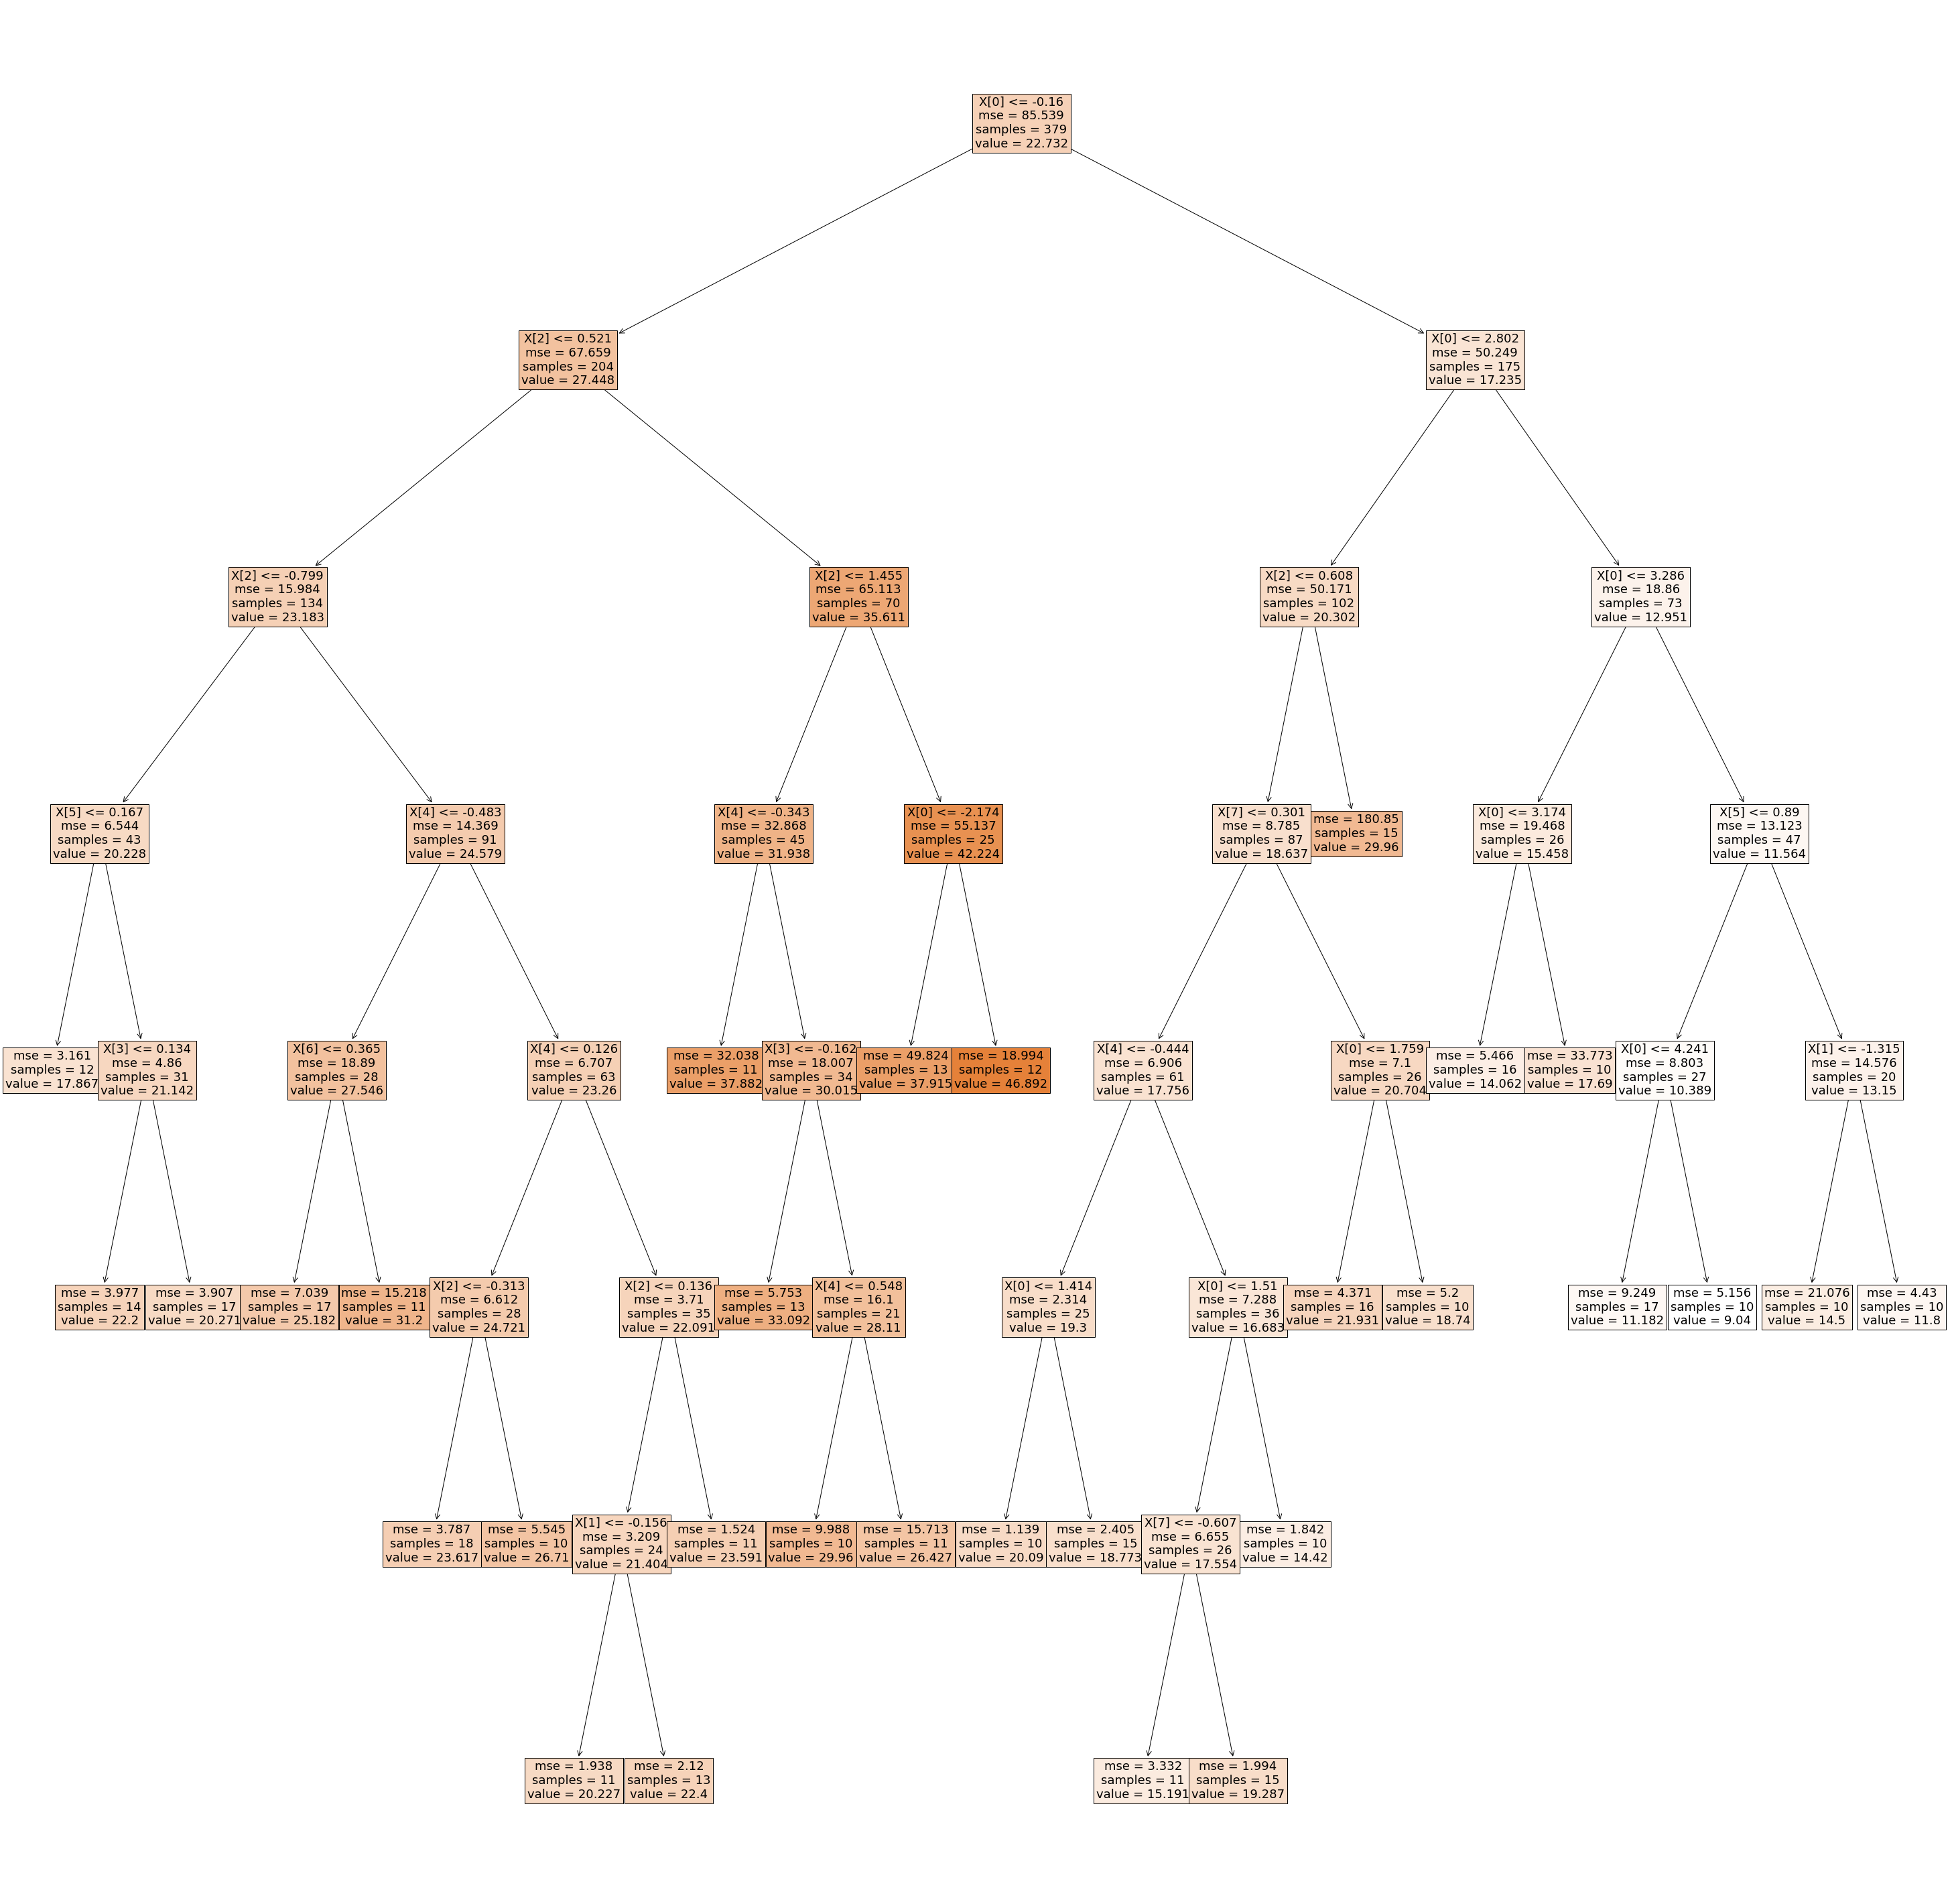

In [30]:
# Fazendo a Predição do Modelo:
y_pred = final_dt.predict(X_test_PCA)

# Avaliando o Modelo:
resultados = {}

name = "Decision tree"
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2)

resultados[name] = {}
resultados[name]["rmse"] = rmse
resultados[name]["r2"] = r2

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(52,52))
plot_tree(final_dt, filled=True, fontsize = 18)